In [1]:
# Loading the dataset
# Import pandas library
import pandas as pd
# Import numpy
import numpy as np
# Reading the dataset
mydata = pd.read_csv("FT1-area-gp.ep-aim.csv")

In [2]:
mydata.head()

,URN,R_area,U_area,Rep_area,Uep_area,Age
0,FL008_T1_001,0.0,0.0,0.0,0.0,309
1,FL008_T1_002,0.0,0.0,0.0,0.0,309
2,FL008_T1_003,0.0,0.0,0.0,0.0,309
3,FL008_T1_004,0.0,0.0,0.0,0.0,309
4,FL008_T1_005,0.0,0.0,0.0,0.0,309


In [3]:
mydata.describe()

,R_area,U_area,Rep_area,Uep_area,Age
count,980.000000,980.000000,980.000000,980.000000,980.000000
mean,72.497066,28.533163,218.907526,61.281122,224.814286
std,111.932407,58.082307,383.375867,133.016942,59.038069
min,0.000000,0.000000,0.000000,0.000000,121.000000
25%,0.000000,0.000000,0.000000,0.000000,174.750000
50%,0.000000,0.000000,0.000000,0.000000,222.000000
75%,129.093750,21.093750,345.906250,0.000000,282.000000
max,486.500000,318.500000,1645.750000,700.500000,323.000000


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   URN       980 non-null    object 
 1   R_area    980 non-null    float64
 2   U_area    980 non-null    float64
 3   Rep_area  980 non-null    float64
 4   Uep_area  980 non-null    float64
 5   Age       980 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 46.1+ KB


In [5]:
X = mydata.drop(['URN', 'Age'], axis = 1)
print(X)

      R_area  U_area  Rep_area  Uep_area
0      0.000   0.000     0.000     0.000
1      0.000   0.000     0.000     0.000
2      0.000   0.000     0.000     0.000
3      0.000   0.000     0.000     0.000
4      0.000   0.000     0.000     0.000
..       ...     ...       ...       ...
975  188.375  30.625  1362.875   361.375
976  152.750   0.000  1420.500   257.250
977  109.625   0.000   835.875     0.000
978   63.875   0.000   524.125     0.000
979   23.500   0.000   191.500     0.000

[980 rows x 4 columns]


In [6]:
y = mydata['Age']
print(y)

0      309
1      309
2      309
3      309
4      309
      ... 
975    189
976    189
977    189
978    189
979    189
Name: Age, Length: 980, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(686, 4) (294, 4) (686,) (294,)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 20 to 684
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   R_area    686 non-null    float64
 1   U_area    686 non-null    float64
 2   Rep_area  686 non-null    float64
 3   Uep_area  686 non-null    float64
dtypes: float64(4)
memory usage: 26.8 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 686 entries, 20 to 684
Series name: Age
Non-Null Count  Dtype
--------------  -----
686 non-null    int64
dtypes: int64(1)
memory usage: 10.7 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 440 to 451
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   R_area    294 non-null    float64
 1   U_area    294 non-null    float64
 2   Rep_area  294 non-null    float64
 3   Uep_area  294 non-null    float64
dtypes: float64(4)
memory usage: 11.5 KB


In [11]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 294 entries, 440 to 451
Series name: Age
Non-Null Count  Dtype
--------------  -----
294 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [12]:
pd.set_option('display.max_rows', 500)
print(y_test)

440    303
412    254
331    223
625    231
578    281
899    190
904    318
698    222
780    304
717    178
14     235
382    143
97     315
913    153
253    265
214    273
768    130
736    159
842    308
251    265
576    281
27     245
31     245
362    156
456    289
403    184
390    125
907    318
604    288
711    283
77     322
408    254
230    262
443    276
312    304
771    130
873    218
432    181
424    181
784    304
45     271
103    201
968    317
108    175
925    130
654    273
372    287
122    253
590    171
55     169
489    213
917    153
267    287
215    273
949    186
142    163
236    166
330    223
619    256
366    156
966    317
583    255
175    230
671    238
951    186
364    156
689    259
141    163
516    283
389    125
969    189
592    171
279    186
652    273
522    190
680    292
272    186
477    290
830    185
553    311
710    283
908    318
271    186
582    255
65     268
204    179
270    287
650    273
317    304
757    150
622    231

In [13]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiation of the model

model = RandomForestRegressor()
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

In [14]:
# Fitting the model

Age_rf = model.fit(X_train, y_train)

In [15]:
# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = Age_rf.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

The training r_sq is: 0.82
The MAE is: 16.99
The MAPE is: 0.07
The MSE is: 612.55
The RMSE is: 24.75
The EVS is: 0.82


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Age_rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
rf_rmse_scores = np.sqrt(-scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rf_rmse_scores)

Scores: [30.05700827 29.42144342 28.01876099 28.05713819 28.96548905 25.61574415
 27.09680403 28.71346612 25.16866093 29.55213148]
Mean: 28.066664662474306
Standard deviation: 1.5677434231415222


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8], 'max_depth': [2, 4, 8, 16, 36, 64]}
]

Age_rf = RandomForestRegressor()

grid_search = GridSearchCV(Age_rf, param_grid, cv= 10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 4, 'max_features': 2, 'n_estimators': 128}

In [19]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=4, max_features=2,
                      n_estimators=128)

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres ["params"]):
    print(np.sqrt(-mean_score), params)

28.016459027318025 {'max_features': 2, 'n_estimators': 64}
27.88824270028321 {'max_features': 2, 'n_estimators': 128}
27.92840588161722 {'max_features': 2, 'n_estimators': 256}
28.14504993353071 {'max_features': 4, 'n_estimators': 64}
28.118284428046405 {'max_features': 4, 'n_estimators': 128}
28.055403219813744 {'max_features': 4, 'n_estimators': 256}
28.048358353551787 {'max_features': 6, 'n_estimators': 64}
28.032804225890654 {'max_features': 6, 'n_estimators': 128}
28.0660511958878 {'max_features': 6, 'n_estimators': 256}
28.071174382654263 {'max_features': 8, 'n_estimators': 64}
28.098317199373884 {'max_features': 8, 'n_estimators': 128}
28.08223861133628 {'max_features': 8, 'n_estimators': 256}
29.23612821614117 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 64}
29.295996101707207 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 128}
29.207359584001345 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 256}
30.5

In [21]:
print('The training r_sq is: %.2f' % grid_search.best_estimator_.score(X_train, y_train))

The training r_sq is: 0.79


In [22]:
final_model = Age_rf

In [23]:
# Prediction on the testing data
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)

In [24]:
print(final_prediction)

[274.97036922 274.97036922 274.97036922 274.97036922 274.97036922
 274.97036922 274.97036922 274.97036922 274.97036922 161.88
 232.17       174.61       274.97036922 144.48       274.97036922
 253.3        141.26       155.76       274.97036922 274.97036922
 274.97036922 231.43321429 200.12       154.78       274.97036922
 176.02       158.04       274.97036922 274.97036922 274.97036922
 274.97036922 274.97036922 274.97036922 274.97036922 274.97036922
 146.65       274.97036922 159.12       166.85       274.97036922
 274.97036922 251.95833333 274.97036922 189.0695     137.42
 274.97036922 274.97036922 274.97036922 173.71       179.67
 274.97036922 141.49       274.97036922 274.97036922 172.61
 172.14       165.58       274.97036922 274.97036922 161.39
 274.97036922 274.97036922 274.97036922 274.97036922 167.13
 172.39       274.97036922 173.58       274.97036922 149.49
 180.04       176.45       192.03       274.97036922 199.3
 274.97036922 178.08       274.97036922 177.14       274.97

In [25]:
# The testing coef. of determination
print('The testing r_sq is: %.2f' % final_model.score(X_test, y_test))

# The metrics 
# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_test, final_prediction))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_test,final_prediction))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_test, final_prediction))

# The RMSE
print('The RMSE is:', np.sqrt(mean_squared_error(y_test, final_prediction)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_test, final_prediction))

The testing r_sq is: 0.79
The MAE is: 20.67
The MAPE is: 0.09
The MSE is: 724.74
The RMSE is: 26.92099780376344
The EVS is: 0.79


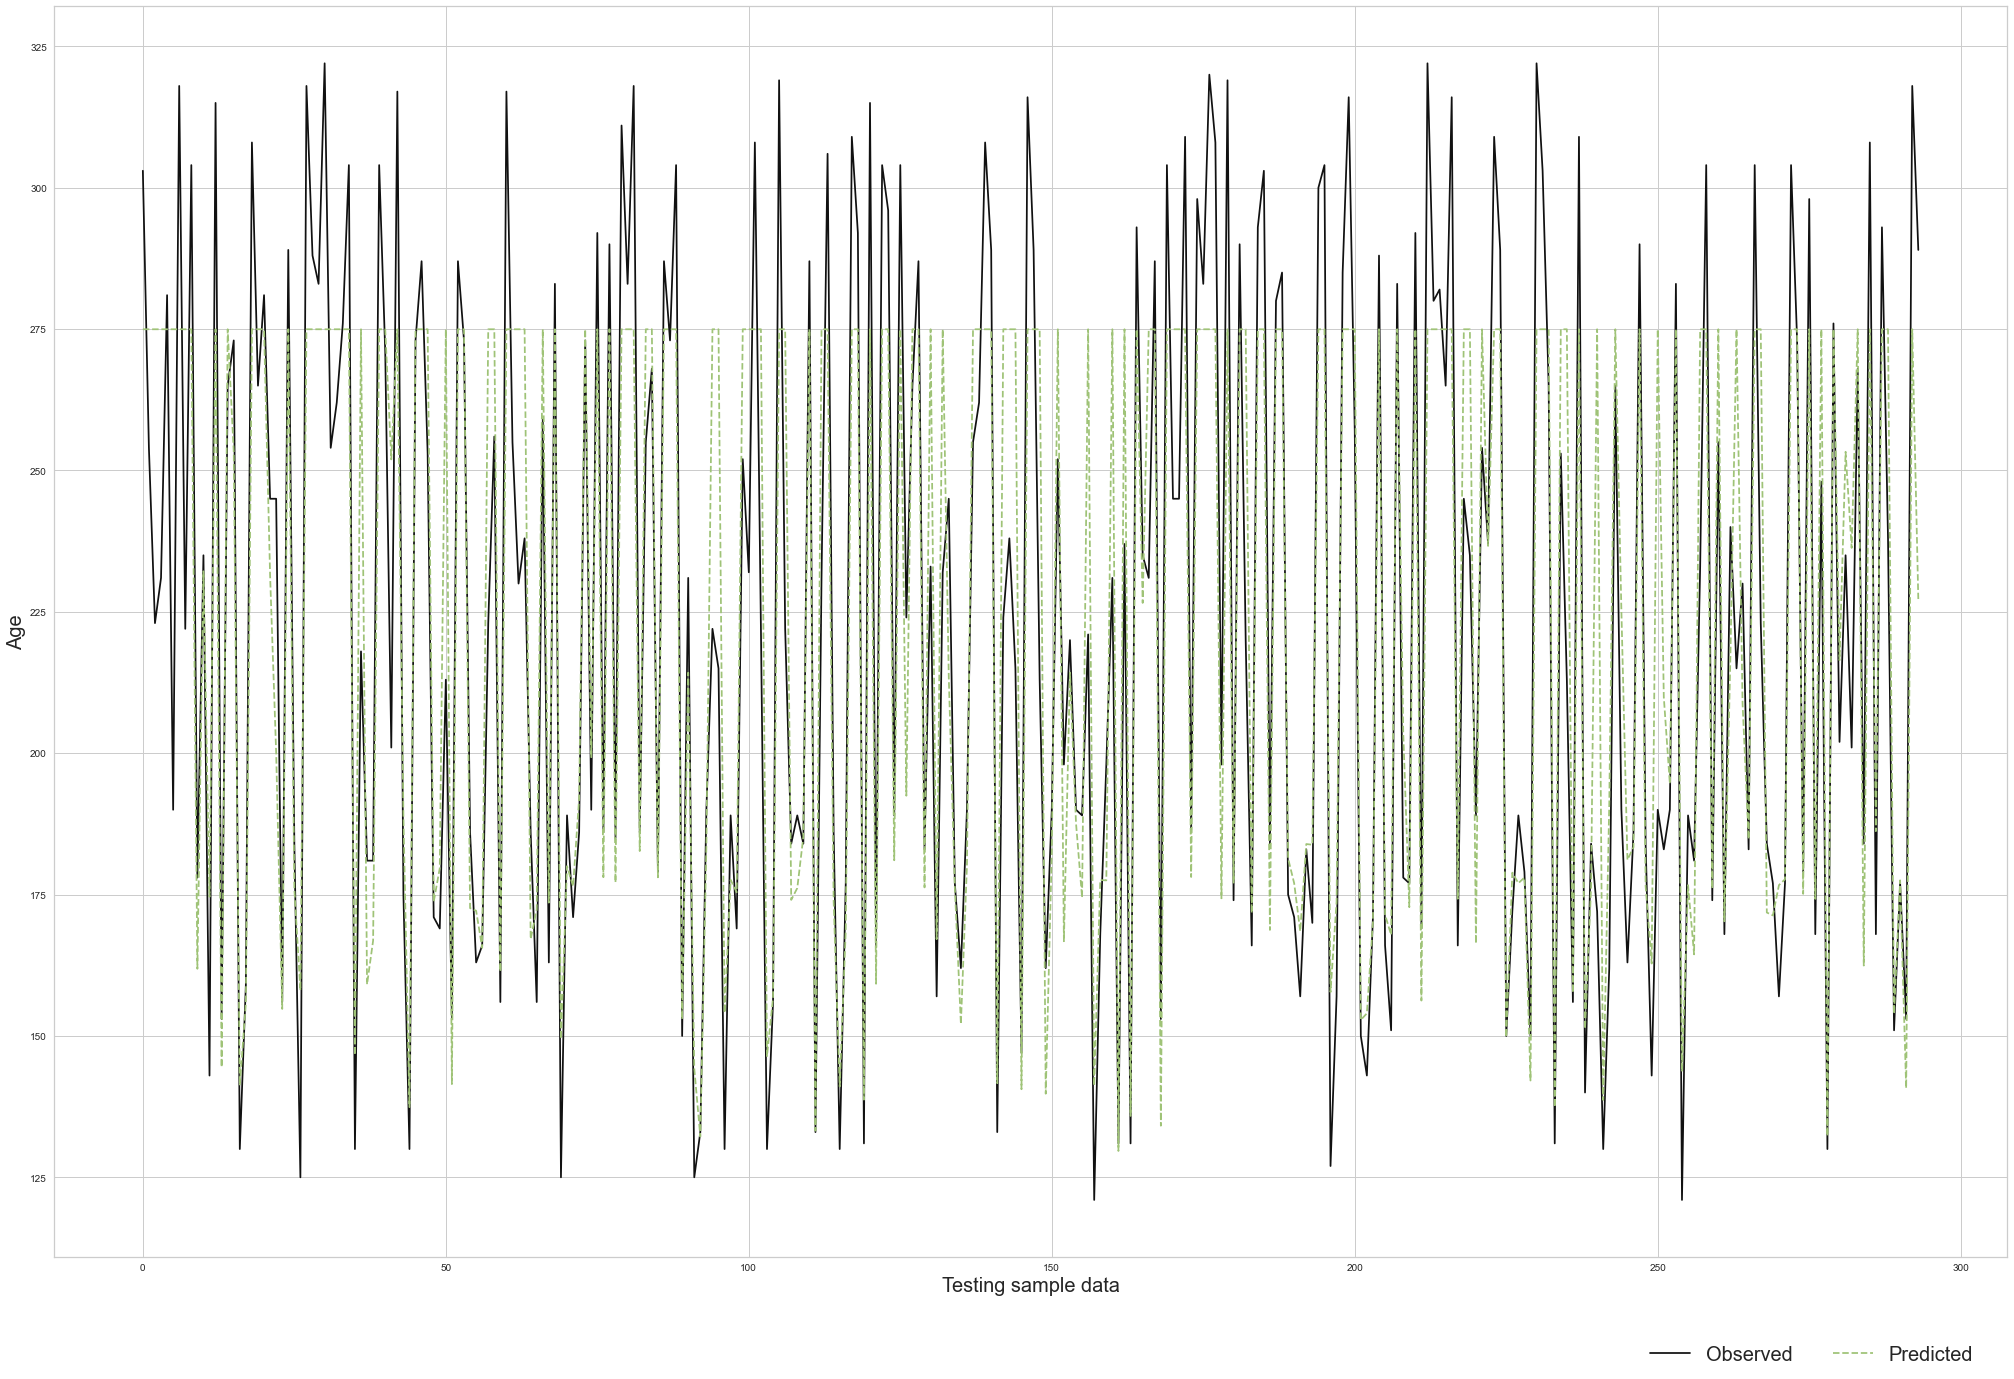

In [31]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (35,23)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, final_prediction, label = 'Predicted', color = 'g', linestyle = '--')
plt.ylabel('Age', fontsize = "20")
plt.xlabel('Testing sample data', fontsize = "20")
plt.legend(bbox_to_anchor = (0.9, -0.1), loc = 'lower center', fontsize = "20", ncol = 2, frameon = False)

In [32]:
# Plotting the prediction error and residuals using yellowbrick
# Anaconda/Cmd prompt and type: pip install yellowbrick!pip install yellowbrick"

In [33]:
!pip install yellowbrick

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


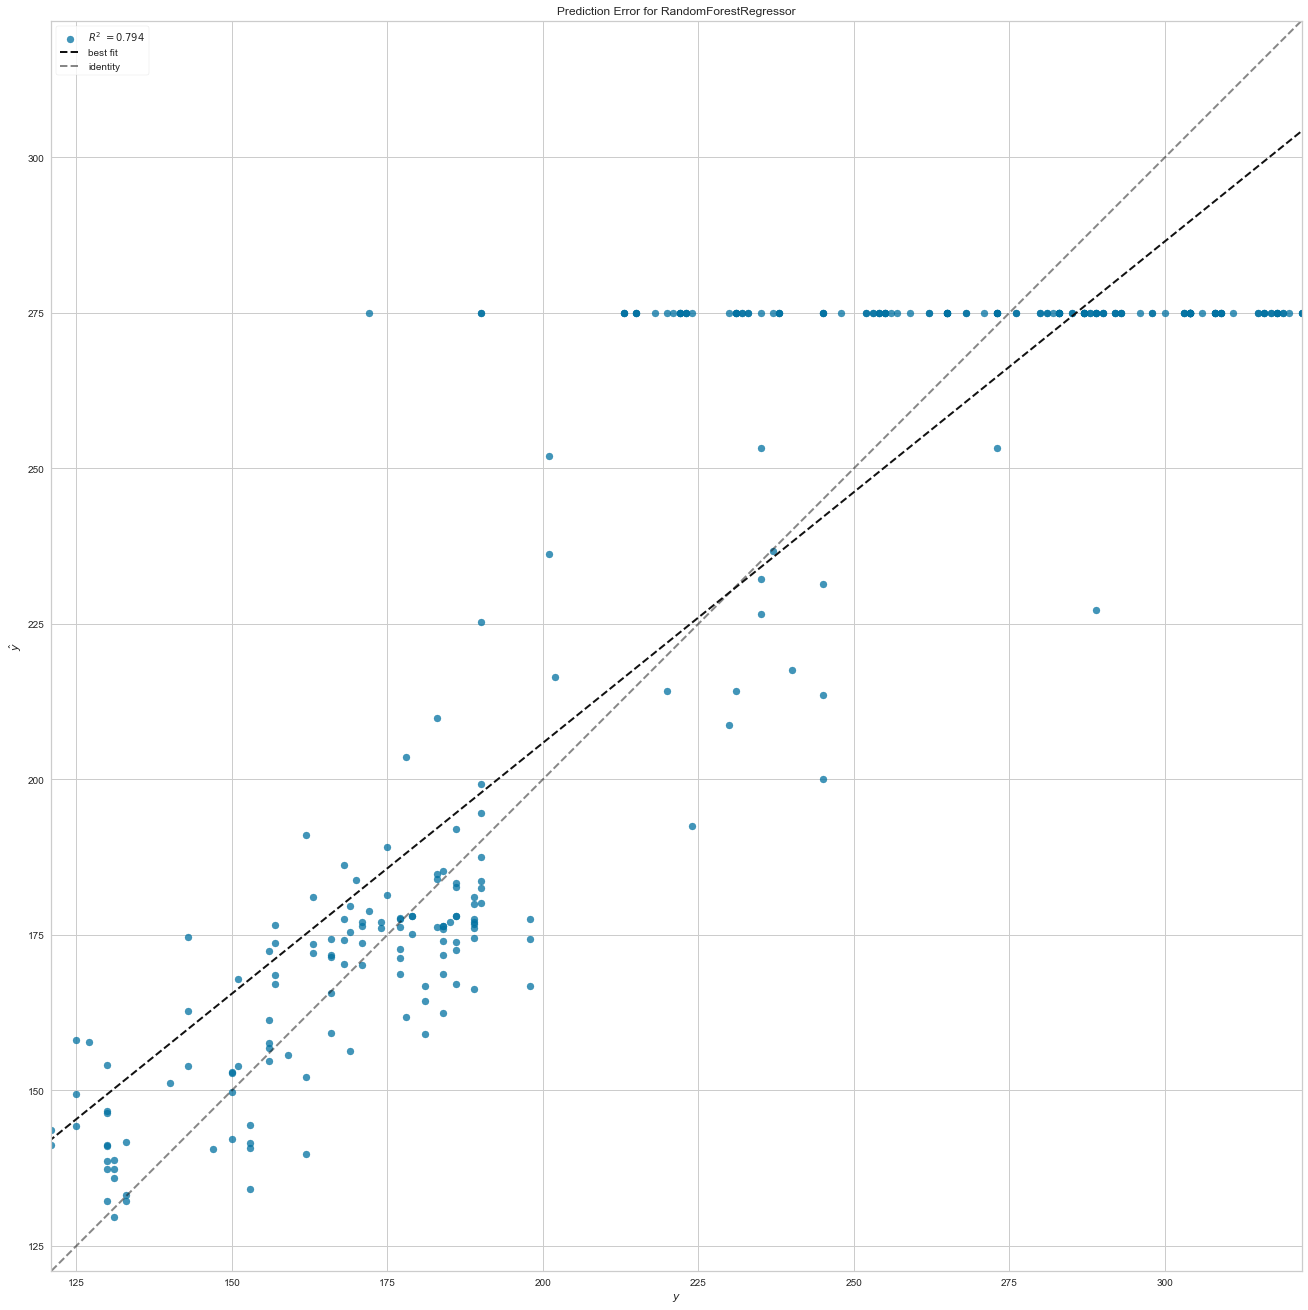

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
# Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


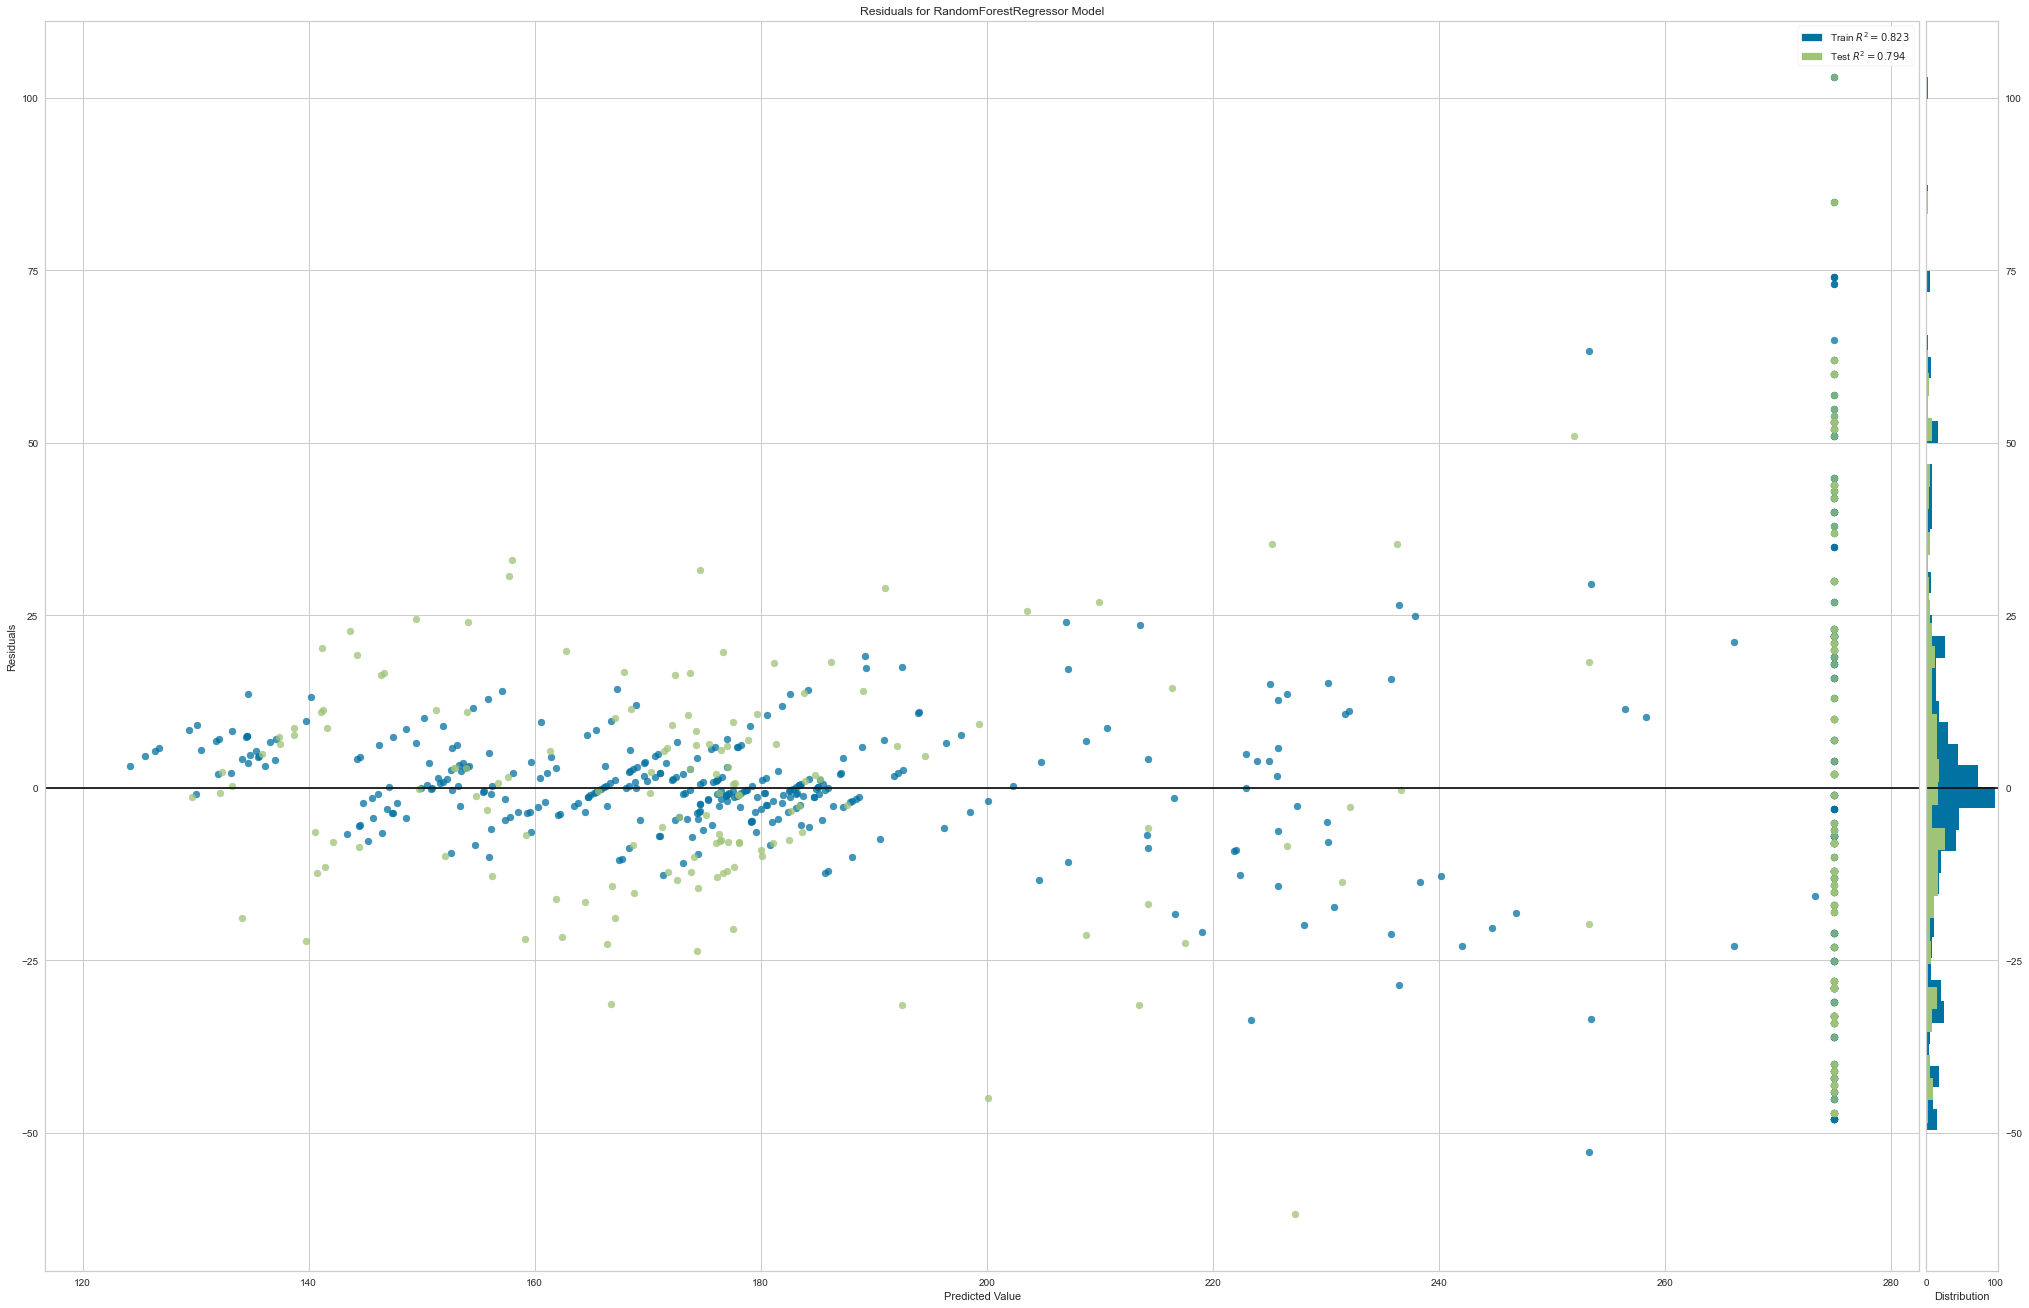

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [36]:
from sklearn.pipeline import Pipeline

f_list = list(X.columns)
f_importance = pd.Series(final_model.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

R_area      0.920410
Rep_area    0.046217
U_area      0.026774
Uep_area    0.006598
dtype: float64


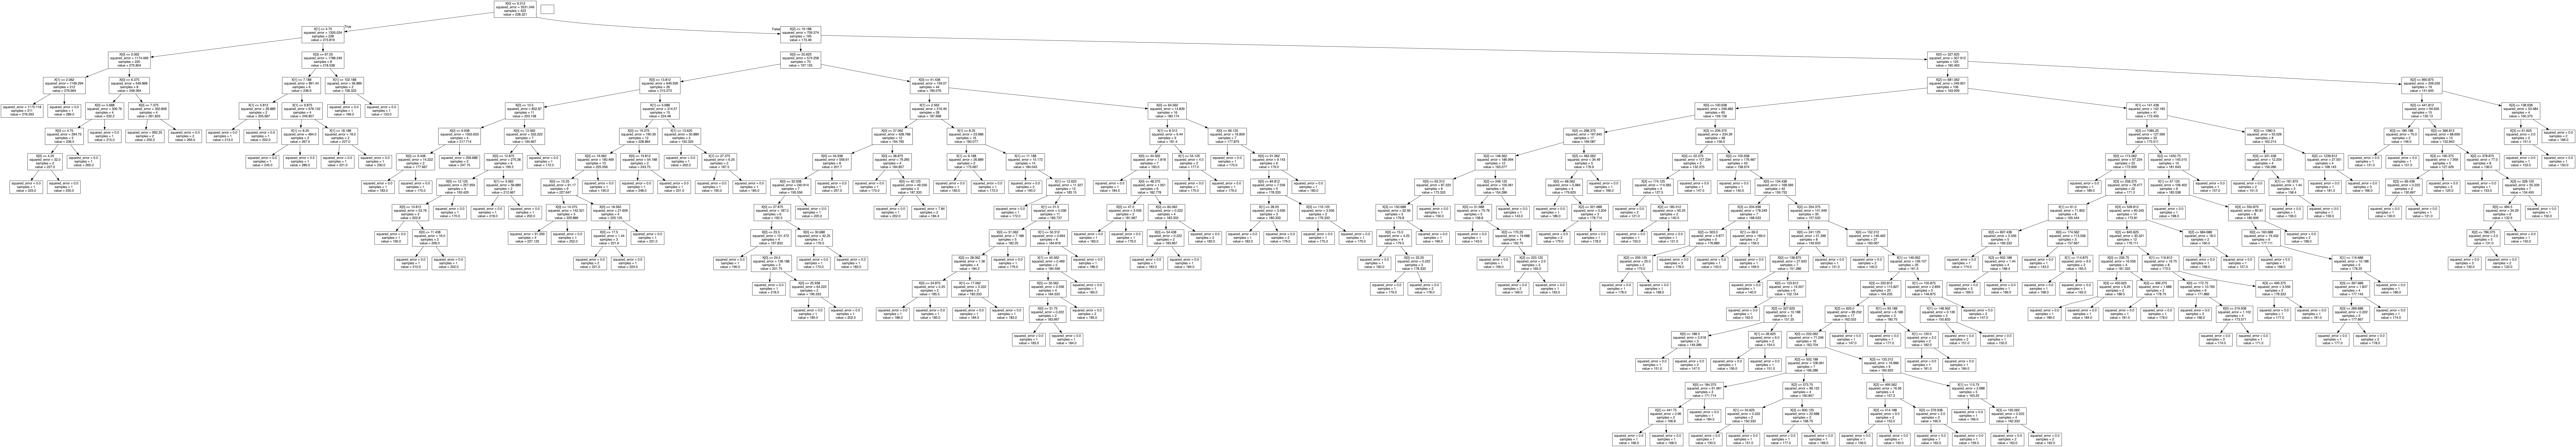

In [39]:
# Visualise the decision trees of the RFR
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
!pip install pydotplus
import pydotplus

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\lib\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

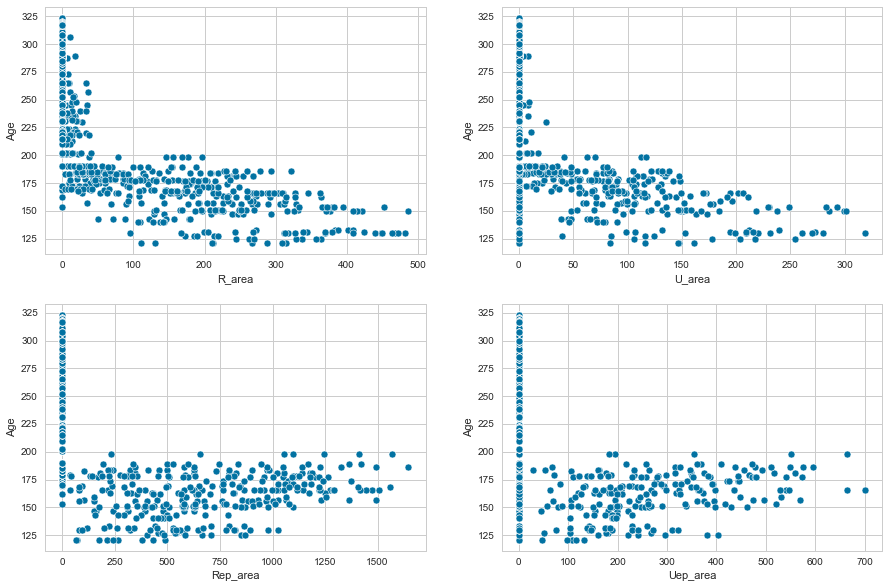

-0.7254965754358279
-0.589128435364271
-0.5565217388677477
-0.4685788741607719


In [37]:
# Pearson's correlation

# Pearson's correlation set up
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams 
import scipy 
from scipy.stats.stats import pearsonr

%matplotlib inline 
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

mydata = pd.read_csv('FT1-area-gp.ep-aim.csv')
mydata.columns = ['URN', 'R_area', 'U_area', 'Rep_area', 'Uep_area', 'Age']
X = mydata.drop(['URN', 'Age'], axis = 1)
y = mydata['Age']
fig,axis = plt.subplots (2,2, figsize = (15,10))
sb.scatterplot (x = 'R_area', y = 'Age', data = mydata, ax=axis[0,0])
sb.scatterplot (x = 'U_area', y = 'Age', data = mydata, ax=axis[0,1])
sb.scatterplot (x = 'Rep_area', y = 'Age', data = mydata, ax=axis[1,0])
sb.scatterplot (x = 'Uep_area', y = 'Age', data = mydata, ax=axis[1,1])
plt.show()

corr1,_ = pearsonr(mydata['Age'], mydata['R_area'])
corr2,_ = pearsonr(mydata['Age'], mydata['Rep_area'])
corr3,_ = pearsonr(mydata['Age'], mydata['U_area'])
corr4,_ = pearsonr(mydata['Age'], mydata['Uep_area'])
print(corr1)
print(corr2)
print(corr3)
print(corr4)